In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns

In [3]:
import datetime
%load_ext tensorboard
# Clear any logs from previous runs
!del -rf ./logs/ 

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Invalid switch - "logs".


In [4]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()
X_train.shape

11490434/11490434 [==============================] - 87s 8us/step


(60000, 28, 28)

In [5]:
single_image=X_train[0]

In [6]:
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [7]:
single_image.shape

(28, 28)

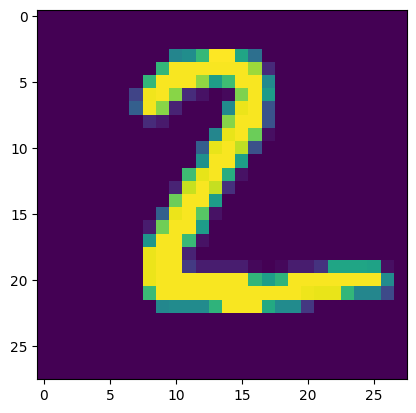

In [19]:
plt.imshow(X_test[1])

In [15]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [16]:
from tensorflow.keras.utils import to_categorical
y_categorical_train=to_categorical(y_train)
y_categorical_test=to_categorical(y_test)

In [17]:
y_categorical_test[1]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [20]:
single_image.max()

255

In [21]:
single_image.min()

0

In [22]:
X_train=X_train/255
X_test=X_test/255

In [25]:
scaled_single_image=X_train[1]

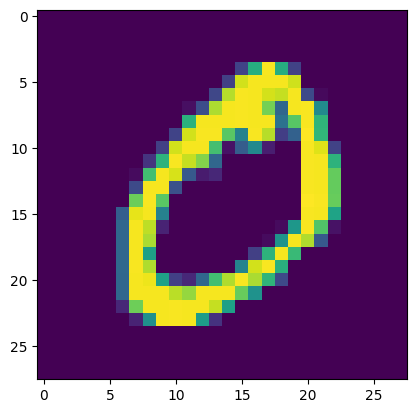

In [26]:
plt.imshow(scaled_single_image)

In [27]:
X_train[0].max()

1.0

In [28]:
X_train.shape

(60000, 28, 28)

In [29]:
X_train=X_train.reshape(60000,28,28,1)

In [30]:
X_train.shape

(60000, 28, 28, 1)

In [32]:
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 128)               589952    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 591786 (2.26 MB)
Trainable params: 591786 (2.26 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

In [33]:
from tensorflow.keras.callbacks import TensorBoard
log_dir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

In [34]:
model.fit(X_train,y_categorical_train,epochs=10,validation_data=(X_test,y_categorical_test),callbacks=[tensorboard_callback])

Epoch 1/10
1875/1875 [==============================] - 20s 10ms/step - loss: 0.1438 - accuracy: 0.9574 - val_loss: 0.0482 - val_accuracy: 0.9843
Epoch 2/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0476 - accuracy: 0.9853 - val_loss: 0.0394 - val_accuracy: 0.9874
Epoch 3/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0309 - accuracy: 0.9906 - val_loss: 0.0368 - val_accuracy: 0.9876
Epoch 4/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0204 - accuracy: 0.9932 - val_loss: 0.0391 - val_accuracy: 0.9878
Epoch 5/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0139 - accuracy: 0.9954 - val_loss: 0.0396 - val_accuracy: 0.9873
Epoch 6/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0106 - accuracy: 0.9964 - val_loss: 0.0429 - val_accuracy: 0.9878
Epoch 7/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0090 - accuracy: 0.9970 - val_loss: 0.0443 -

In [35]:
import pandas as pd
curves=pd.DataFrame(model.history.history)

In [36]:
curves

,loss,accuracy,val_loss,val_accuracy
0,0.143764,0.957350,0.048207,0.9843
1,0.047620,0.985283,0.039421,0.9874
2,0.030894,0.990617,0.036760,0.9876
3,0.020430,0.993217,0.039052,0.9878
4,0.013894,0.995433,0.039560,0.9873
5,0.010581,0.996400,0.042924,0.9878
6,0.008951,0.996967,0.044297,0.9872
7,0.006185,0.998033,0.045487,0.9883
8,0.005516,0.998067,0.041570,0.9887
9,0.004320,0.998567,0.053041,0.9870


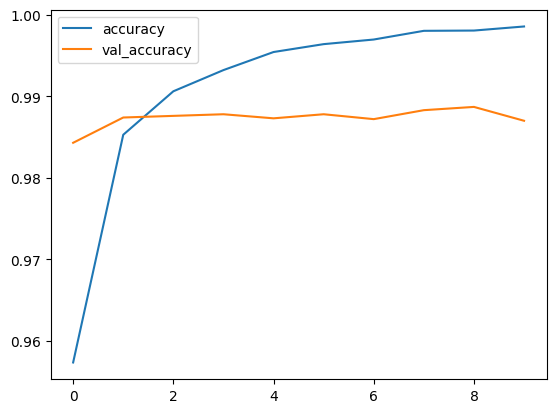

In [37]:
curves[['accuracy','val_accuracy']].plot();

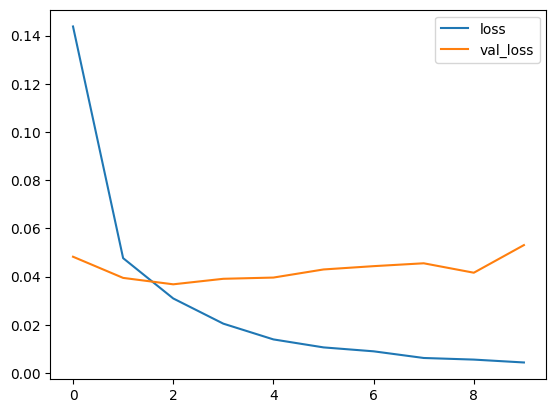

In [38]:
curves[['loss','val_loss']].plot();

In [39]:
print(model.metrics_names)
print(model.evaluate(X_test,y_categorical_test,verbose=0))

['loss', 'accuracy']
[0.05304063856601715, 0.9869999885559082]


In [48]:
preds = model.predict(X_test)
predictions=np.argmax(preds,axis=1)

313/313 [==============================] - 1s 3ms/step


In [49]:
predictions[0]


7

In [50]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [51]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.98      0.99      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.98      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       1.00      0.97      0.99      1028
           8       0.97      0.99      0.98       974
           9       0.98      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [52]:
confusion_matrix(y_test,predictions)

array([[ 975,    0,    1,    1,    0,    0,    2,    0,    1,    0],
       [   0, 1132,    2,    0,    0,    0,    0,    0,    1,    0],
       [   1,    1, 1023,    1,    0,    0,    2,    2,    2,    0],
       [   0,    0,    4, 1003,    0,    2,    0,    0,    1,    0],
       [   0,    0,    1,    0,  965,    0,    4,    0,    3,    9],
       [   2,    0,    0,    4,    0,  880,    3,    0,    2,    1],
       [   3,    2,    1,    0,    2,    1,  946,    0,    3,    0],
       [   0,    2,   12,    2,    0,    0,    0, 1002,    3,    7],
       [   2,    0,    3,    1,    0,    1,    0,    0,  965,    2],
       [   0,    1,    1,    3,    7,    2,    0,    2,   14,  979]],
      dtype=int64)

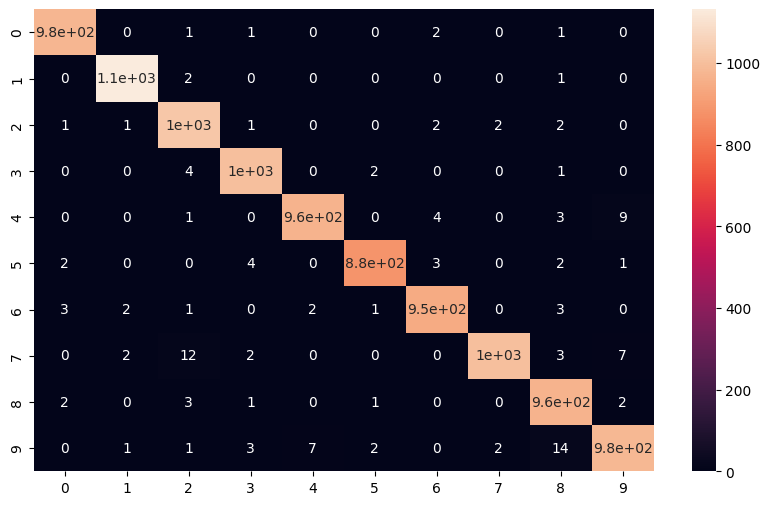

In [54]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True);

In [55]:
test_number=X_test[0]

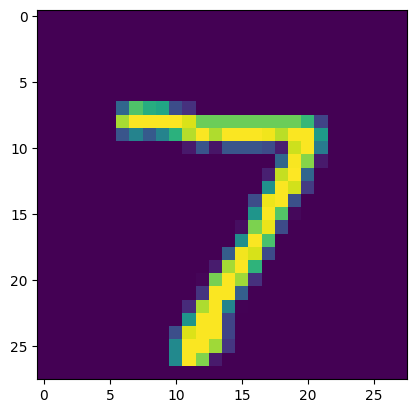

In [56]:
plt.imshow(test_number.reshape(28,28))

In [60]:
print("Predicted Value:", np.argmax(model.predict(test_number.reshape(1,28,28,1)),axis=1)[0])

1/1 [==============================] - 0s 19ms/step
Predicted Value: 7


In [61]:
%tensorboard --logdir logs/fit